In [2]:
from collections import deque,namedtuple

import matplotlib.pyplot as plt
import networkx as nx

In [3]:
def read_graph(filename, debug=False):
    g = nx.Graph()
    with open(filename, "r") as fh:
        for l in fh:
            a, b = l.strip().split("-")
            if debug: print("{}-{}".format(a,b))
            g.add_edge(a, b)
    return g
            
test1 = read_graph("test1.txt")
print(test1.nodes)
print([n for n in test1.neighbors("start")])
test1

['start', 'A', 'b', 'c', 'd', 'end']
['A', 'b']


/home/mzimmerman/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


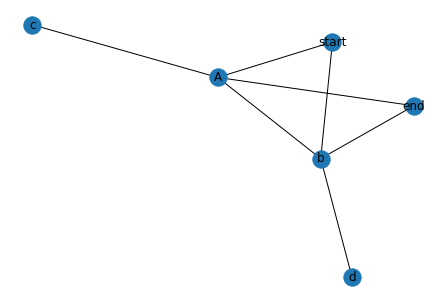

In [4]:
nx.draw(test1, with_labels=True)

In [5]:
def not_visited1(curr, n):
    return n.isupper() or n not in curr

def get_all_paths(g, start="start", end="end", debug=False, not_visited=not_visited1):
    queue = deque()
    queue.append([start])
    #visited = set(start)
    paths = []
    while queue:
        curr = queue.popleft()
        if debug: print(curr)
        if curr[-1] == end:
            paths.append(curr)
        else:
            for n in g.neighbors(curr[-1]):
                if not_visited(curr, n):
                    queue.append(curr + [n])
    return sorted([",".join(p) for p in paths])
        
out1 = get_all_paths(test1)
for o in out1:
    print(o)
len(out1)

start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,end
start,A,c,A,b,A,end
start,A,c,A,b,end
start,A,c,A,end
start,A,end
start,b,A,c,A,end
start,b,A,end
start,b,end


10

In [14]:
test2 = read_graph("test2.txt")
out2 = get_all_paths(test2)
for o in out2:
    print(o)
len(out2)

start,HN,dc,HN,end
start,HN,dc,HN,kj,HN,end
start,HN,dc,end
start,HN,dc,kj,HN,end
start,HN,end
start,HN,kj,HN,dc,HN,end
start,HN,kj,HN,dc,end
start,HN,kj,HN,end
start,HN,kj,dc,HN,end
start,HN,kj,dc,end
start,dc,HN,end
start,dc,HN,kj,HN,end
start,dc,end
start,dc,kj,HN,end
start,kj,HN,dc,HN,end
start,kj,HN,dc,end
start,kj,HN,end
start,kj,dc,HN,end
start,kj,dc,end


19

In [15]:
test3 = read_graph("test3.txt")
len(get_all_paths(test3))

226

In [16]:
inp = read_graph("input.txt")
len(get_all_paths(inp))

3000

In [12]:
def not_visited2(curr, n):
    #print(curr)
    if n.isupper():
        return True
    if n not in curr:
        return True
    else:
        if n == "start" or n == "end":
            return False
        else:
            counts = dict()
            for c in curr:
                if c.islower():
                    if c in counts:
                        # already have 2 of something
                        counts[c] += 1
                        return False
                    else:
                        counts[c] = 1
            return True

out1 = get_all_paths(test1, not_visited=not_visited2)
for o in out1:
    print(o)
len(out1)

start,A,b,A,b,A,c,A,end
start,A,b,A,b,A,end
start,A,b,A,b,end
start,A,b,A,c,A,b,A,end
start,A,b,A,c,A,b,end
start,A,b,A,c,A,c,A,end
start,A,b,A,c,A,end
start,A,b,A,end
start,A,b,d,b,A,c,A,end
start,A,b,d,b,A,end
start,A,b,d,b,end
start,A,b,end
start,A,c,A,b,A,b,A,end
start,A,c,A,b,A,b,end
start,A,c,A,b,A,c,A,end
start,A,c,A,b,A,end
start,A,c,A,b,d,b,A,end
start,A,c,A,b,d,b,end
start,A,c,A,b,end
start,A,c,A,c,A,b,A,end
start,A,c,A,c,A,b,end
start,A,c,A,c,A,end
start,A,c,A,end
start,A,end
start,b,A,b,A,c,A,end
start,b,A,b,A,end
start,b,A,b,end
start,b,A,c,A,b,A,end
start,b,A,c,A,b,end
start,b,A,c,A,c,A,end
start,b,A,c,A,end
start,b,A,end
start,b,d,b,A,c,A,end
start,b,d,b,A,end
start,b,d,b,end
start,b,end


36

In [17]:
len(get_all_paths(test2, not_visited=not_visited2))

103

In [18]:
len(get_all_paths(test3, not_visited=not_visited2))

3509

In [19]:
len(get_all_paths(inp, not_visited=not_visited2))

74222